In [1]:
import tensorflow as tf

2021-12-12 17:22:36.064004: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [4]:
from utils import model_info, plot_history, load_data

X_train, y_train, X_val, y_val, X_test, y_test = load_data()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='deep_cnn')

2021-12-12 17:25:39.508355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-12 17:25:39.508415: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.335GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2021-12-12 17:25:39.509131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-12 17:25:39.509850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-12 17:25:39.509867: I tensor

In [6]:
model_info(model)

Model: "deep_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
checkpoint_filepath = './checkpoint/'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val),callbacks=[reduce_lr, earlystop, checkpoint_callback])

Epoch 1/50
1350/1350 [==============================] - 22s 16ms/step - loss: 0.0540 - accuracy: 0.9791 - val_loss: 0.2390 - val_accuracy: 0.9422
Epoch 2/50
1350/1350 [==============================] - 23s 17ms/step - loss: 0.0527 - accuracy: 0.9795 - val_loss: 0.2575 - val_accuracy: 0.9436
Epoch 3/50
1350/1350 [==============================] - 22s 17ms/step - loss: 0.0497 - accuracy: 0.9814 - val_loss: 0.2622 - val_accuracy: 0.9434
Epoch 4/50
1350/1350 [==============================] - 22s 17ms/step - loss: 0.0458 - accuracy: 0.9826 - val_loss: 0.2793 - val_accuracy: 0.9439
Epoch 5/50
1350/1350 [==============================] - 22s 16ms/step - loss: 0.0452 - accuracy: 0.9826 - val_loss: 0.2740 - val_accuracy: 0.9435
Epoch 6/50
1350/1350 [==============================] - 24s 18ms/step - loss: 0.0430 - accuracy: 0.9838 - val_loss: 0.2792 - val_accuracy: 0.9434
Epoch 7/50
1350/1350 [==============================] - 22s 16ms/step - loss: 0.0427 - accuracy: 0.9840 - val_loss: 0.2821 -

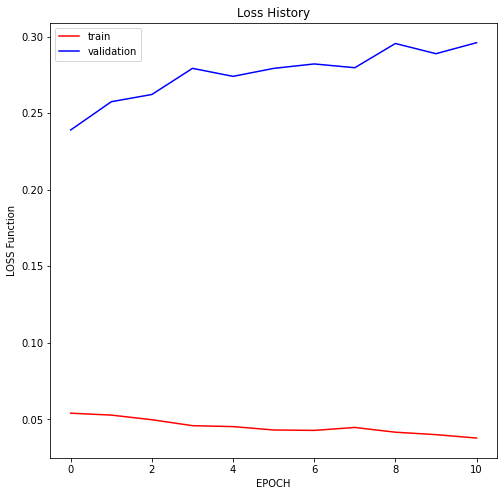

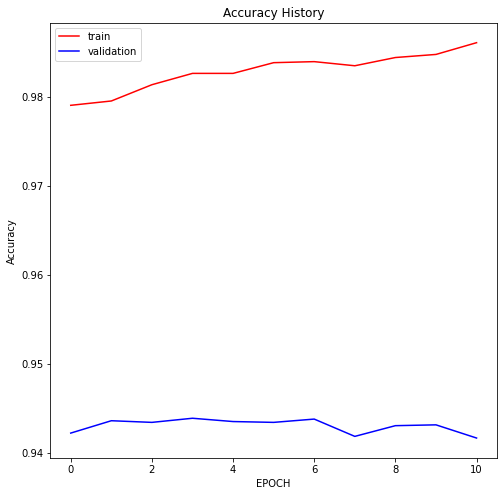

In [24]:
plot_history(history)

In [22]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 2s 9ms/step - loss: 0.2778 - accuracy: 0.9427


[0.2778130769729614, 0.9426666498184204]

In [ ]:
model.save('models/deep_cnn.h5')

In [23]:
from submission import submit

submit(model, 'deep_cnn')